In [1]:
"Alzheimer Disease predection using SVM"

'Alzheimer Disease predection using SVM'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
data = pd.read_csv(r"oasis_longitudinal.csv")

In [4]:
data.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
data.shape

(373, 15)

In [6]:
#check null value present in dataset
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
# Handle NaN values if needed
data = data.dropna()
data.isnull().sum()
data.shape

(354, 15)

In [8]:
#Before Lable 
data[['Group','Hand','M/F']].head(15)

,Group,Hand,M/F
0,Nondemented,R,M
1,Nondemented,R,M
5,Nondemented,R,F
6,Nondemented,R,F
7,Nondemented,R,M
8,Nondemented,R,M
9,Nondemented,R,M
13,Nondemented,R,F
14,Nondemented,R,F
15,Demented,R,M


In [9]:
# Encode 'Group' using label encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
data['Group'] = label_encoder.fit_transform(data['Group'])
data['Hand'] = label_encoder.fit_transform(data['Hand'])
data['M/F'] = label_encoder.fit_transform(data['M/F'])
data[['Group','Hand','M/F']].head(15)

,Group,Hand,M/F
0,2,0,1
1,2,0,1
5,2,0,0
6,2,0,0
7,2,0,1
8,2,0,1
9,2,0,1
13,2,0,0
14,2,0,0
15,1,0,1


In [10]:
data.describe()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,354.000000,354.000000,354.000000,354.000000,354.0,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.432203,1.884181,601.353107,0.423729,0.0,77.033898,14.703390,2.460452,27.409605,0.271186,1489.991525,0.729879,1.193780
std,0.675078,0.925330,640.596081,0.494848,0.0,7.811808,2.895662,1.134005,3.712626,0.370537,175.768462,0.037842,0.136821
min,0.000000,1.000000,0.000000,0.000000,0.0,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,1.000000,0.000000,0.000000,0.0,71.000000,12.000000,2.000000,27.000000,0.000000,1358.250000,0.699000,1.100250
50%,2.000000,2.000000,559.500000,0.000000,0.0,77.000000,15.000000,2.000000,29.000000,0.000000,1470.500000,0.729000,1.193500
75%,2.000000,2.000000,882.500000,1.000000,0.0,82.000000,16.750000,3.000000,30.000000,0.500000,1595.250000,0.757000,1.292500
max,2.000000,5.000000,2639.000000,1.000000,0.0,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [11]:
# Drop non-numeric columns
non_numeric_columns = ['Subject ID', 'MRI ID']
data = data.drop(non_numeric_columns, axis=1)

In [12]:
##Model selection
from sklearn.model_selection import train_test_split

X = data.drop(['Group'], axis=1)
y = data['Group']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8873239436619719


In [15]:
# Example prediction for a new data point feature by feature

# Define feature names in the same order as your dataset
# feature_names = ['Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']


# Initialize an empty list to store feature values
new_data_point = [1, 0, 0, 1, 75, 12, 2.0, 23.0, 0.5, 1678, 0.736, 1.046]

# # Collect values for each feature
# for feature_name in feature_names:
#     value = input(f"Enter the value for {feature_name}: ")
#     new_data_point.append(float(value))  # Ensure the input is converted to the appropriate data type

# Reshape the list to a 2D array as the model expects
new_data_point = [new_data_point]

# Map for human-readable labels
label_mapping = {2: 'Nondemented', 1: 'Demented'}

# Make a prediction
predicted_group = svm_model.predict(new_data_point)

# Map the predicted label to human-readable label
predicted_label = label_mapping[predicted_group[0]]

print(f"Predicted Group: {predicted_label}")


Predicted Group: Demented


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


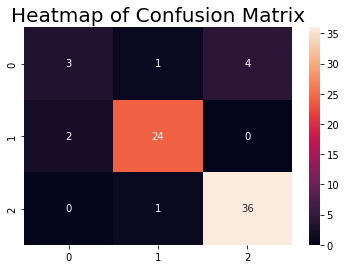

In [16]:
#confusion metrix
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
cm=confusion_matrix(y_test,y_pred)
plt.title("Heatmap of Confusion Matrix",fontsize=20)
sns.heatmap(cm,annot=True)
plt.show()

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.92      0.92      0.92        26
           2       0.90      0.97      0.94        37

    accuracy                           0.89        71
   macro avg       0.81      0.76      0.77        71
weighted avg       0.87      0.89      0.88        71

